### Illustration-1 :  Gradient Descent for y = (x−5)**2


[0 1 2 3 4 5 6 7 8 9] [25 16  9  4  1  0  1  4  9 16]


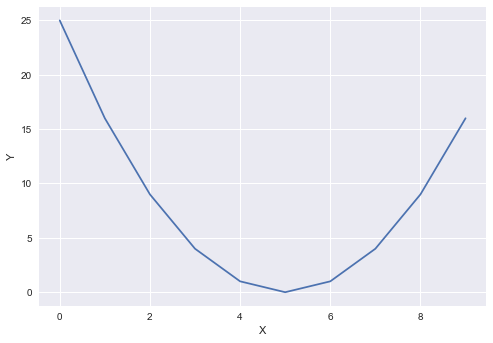

1.0
1.8
2.4400000000000004
2.9520000000000004
3.3616
3.68928
3.9514240000000003
4.1611392
4.32891136
4.4631290880000005
4.570503270400001
4.65640261632
4.725122093056
4.7800976744448
4.82407813955584
4.859262511644672
4.8874100093157375
4.90992800745259
4.927942405962073
4.942353924769658
4.953883139815726
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803854
4.990328593443083
4.992262874754466
4.993810299803573
4.995048239842858
4.996038591874287
4.996830873499429
4.9974646987995435
4.997971759039634
4.9983774072317075
4.998701925785366
4.998961540628293
4.999169232502634
4.999335386002107
4.999468308801686
4.9995746470413485
4.999659717633079
4.9997277741064625
4.99978221928517
4.999825775428136
4.999860620342509
4.999888496274007
4.999910797019206
4.999928637615365


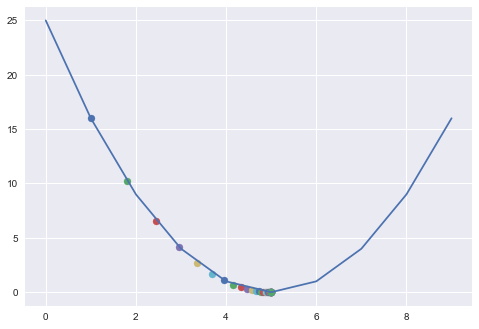

In [1]:
import numpy as np        #for numeric computations 
import matplotlib.pyplot as plt  #for visualizing the result

X = np.arange(10)   #creating numeric sequences of 10 numbers equally spaced
Y = (X-5)**2         # functional value at point X

print(X,Y)        # print the values of Y for corresponding X

plt.style.use('seaborn') #grid in the background of the plot
plt.plot(X,Y)            # plot the graph of the function
plt.xlabel('X')          # variable on X-axis
plt.ylabel('Y')          # variable on Y-axis
plt.show()               # show the plot


x = 0   #initial iteration from where we are starting
learning_rate = 0.1  # step size/ learning rate tells us how fast or slow, we will reach to the minimum point.
error = []   #collect the errror in this variable

#50 steps in the downhill direction

plt.plot(X,Y)

for i in range(50):
  grad = 2 * (x-5)  # derivative of the function
  x = x - learning_rate * grad  #gradient descent function's line
  y = (x-5)**2    #updated values of y by updated values of iteration x
  error.append(y)  # put the collected updated values of y in error
  plt.scatter(x,y) # scatter plot will show the result of Gradient Descent Algorithm
  print(x)  # Values corresoonding to 50 iterations
  

### Illustration-2: Gradient Descent for Sample House Data

Loss: 6.279181399821236e-05 a=0.64 b=0.34 c=0.00


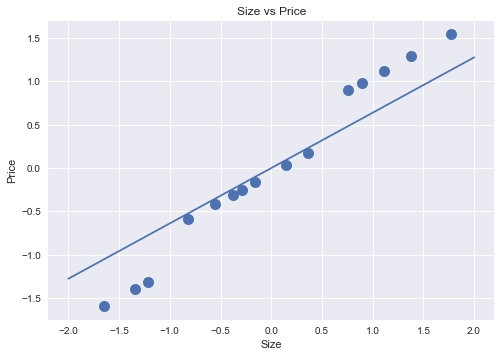

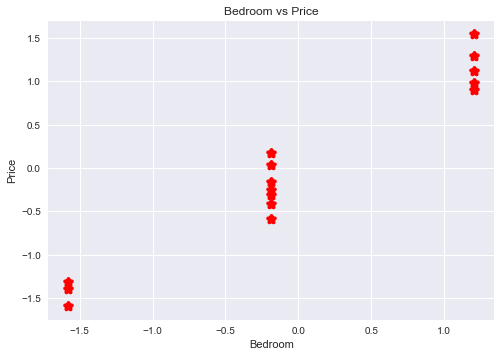

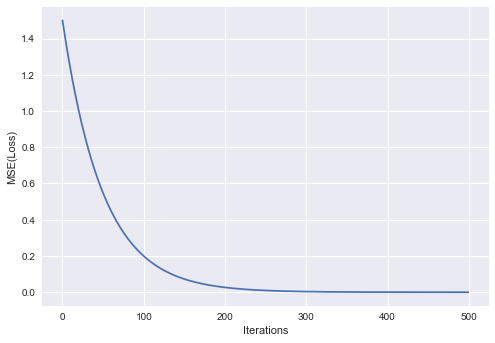

In [2]:
import pandas as pd        # pandas is used for working with data sets
import matplotlib.pyplot as plt    #for visualizing the results and plots
import numpy as np            #for numeric computations in python


df = pd.read_csv("Sample_house.csv") #loading the data from the directory

df.head() # to see some values of the data from the top

x = list((df['Size'].values - df['Size'].values.mean())/df['Size'].values.std()) #normalizing the data by subtracting mean and dividing by stanadard deviation

y = list((df['Bedroom'].values - df['Bedroom'].values.mean())/df['Bedroom'].values.std())

z = list((df['Price'].values - df['Price'].values.mean())/df['Price'].values.std())

def F(x,y,a,b,c):     #this is the function we assumed for our data, we have to find the value a,b and c 
    return x*a + y*b + c

def grad(X,Y,Z,a,b,c):    #gradient descent function
    lr = 0.01
    a = a - lr * sum([ 2*(F(x,y,a,b,c)-z) * x for x,y,z in zip(X,Y,Z)]) * 1/15  #gradient descent formula
    b = b - lr * sum([ 2*(F(x,y,a,b,c)-z) * y for x,y,z in zip(X,Y,Z)]) * 1/15
    c = c - lr * sum([ 2*(F(x,y,a,b,c)-z) * 1 for x,y,z in zip(X,Y,Z)]) * 1/15
    return a,b,c

def loss(x,y,z,a,b,c):    # loss function is the difference between the actual value and the predicted value
    return (F(x,y,a,b,c) - z)**2
lo = []  # in this variable we will collect our loss corresponding to the iterations
a,b,c = 0.5,1,1.5  # initialize with these values or initil iterations
  # loss threshold value,we will stop when we reach to this point.
for _ in range(500):
        l =sum([F(i,j,a,b,c) for i,j in zip(x,y)])/15 #total loss 
        #print(f"Loss: {l} a={a:.2f} b={b:.2f} c={c:.2f}") #printing values 
        a,b,c = grad(x,y,z,a,b,c) #
        lo += [l] # updating values after iterations in this 
print(f"Loss: {l} a={a:.2f} b={b:.2f} c={c:.2f}")
#xx = df['Size'].values
#xx_norm = (xx-xx.mean())/xx.std()
#yy = df['Bedroom'].values
#yy_norm = (yy-yy.mean())/yy.std()
zz_norm = F(np.array(x),np.array(y),a,b,c)


s = np.linspace(-2,2,100)
p = F(s,0,a,b,c)
plt.plot(s,p)
plt.scatter(x,zz_norm,marker="o",linewidths=4)
plt.title("Size vs Price")
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

plt.scatter(y,zz_norm,marker='*',linewidth=4,color='red')
plt.title("Bedroom vs Price")
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

plt.plot(lo)
plt.xlabel('Iterations')
plt.ylabel('MSE(Loss)')
plt.show()

### Stochastic Gradient Descent ( Sample_house Data)  

Loss: 0.037373 a=0.70 b=0.37 c=0.02


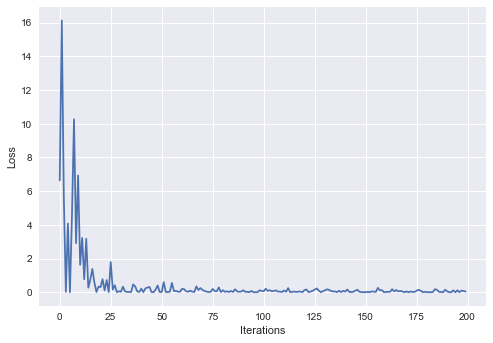

[0.7020593878817889, 0.3661545630351011, 0.017506043373884523]

In [3]:
#importing the required libraries

import random                    #Random module is an in-built module of Python which is used to generate random numbers
import pandas as pd              # for data analysis part
import matplotlib.pyplot as plt  # use for visualising plots, graph etc

df = pd.read_csv("Sample_house.csv")    # importing our data set

#Since the size is given in 3 digits, no. of bedrooms is given in single digits and price of the house
# is given in 6 digits. Before doing any further analysis, we should make all 3 variables/feaatures in a same scale.
#otherwise we will get error in our results.
#For making all three in a single scale, we normalize the features i.e. subtract each data points by mean and divide
# by standard deviation of the corresponding features/data points
# also save the resultant of all three features in list after normalizing it.

x = list((df['Size'].values - df['Size'].values.mean())/df['Size'].values.std())

y = list((df['Bedroom'].values - df['Bedroom'].values.mean())/df['Bedroom'].values.std())

z = list(((df['Price'] - df['Price'].mean())/df['Price'].values.std()))


def F(x,y,a,b,c):           #The assumptions that we are taking for our data(linear relationship)
    return a*x +b*y+c

def loss (x,y,z,a,b,c):     # loss function is the difference between actual value and the predicted value of target variable
    return (F(x,y,a,b,c)-z)**2

def grad(x,y,z,a,b,c,lr):       #gradient function which will take x,y,z,a,b,c and learning rate(lr)
    l = F(x,y,a,b,c) - z        # loss with respect to a single point
    a = a - lr * 2 * l * x      #  gradient w.r.t a
    b = b - lr * 2 * l * y      #  gradient w.r.t b
    c = c - lr * 2 * l * 1      #  gradient w.r.t c
    return a, b, c              # return the value of a,b,c for which loss function minimizes

def SGD(X,Y,Z,a,b,c,N,lr):         # stochastic gradient descent function
    losses=[]                     # we will collect all the losses in this list
    for i in range(N):            # number of iteration that we want to run our algorithm
        idx = random.choice(range(15))     # randomly pick up one row by the SGD
        x,y,z = X[idx], Y[idx], Z[idx]     # save that row in x,y,z
        a,b,c = grad(x,y,z,a,b,c,lr)       # gradient descent will give the updated parameters
        l = loss(x,y,z,a,b,c)              # corresponding to randomly pick up point calculated loss
        #print(f"Loss: {l:3f} a={a:.2f} b={b:.2f} c={c:.2f}")   # print the loss and updated values of a,b,c
        losses += [l]                                          # update the loss after each iterations in the list: losses
    print(f"Loss: {l:3f} a={a:.2f} b={b:.2f} c={c:.2f}")
    return [a,b,c], losses                 # values of a,b,c and losses after last iterations

a,b,c = 1,2,3        # initialize our algorithm by taking any values of a,b,c
lr = 0.03            # learning rate , which tells how fast or slow we will reach to optimal value
N = 200              # number of iterations
W,losses = SGD(x,y,z,a,b,c,N,lr)    # W is a list of [a,b,c] and losses after gradient descent implementation
plt.plot(losses)                    # plot the loss vs iteration
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
W

#Unlike GD, SGD does not necessarily decrease the value of the loss at each step.

### Illustration-3: Gradient Descent for Higher Degree Polynomial 

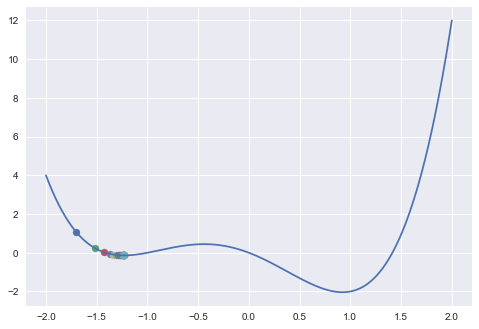

minimum of above function is at x = -1.232456912611067


In [7]:
import matplotlib.pyplot as plt    #for visualizing the results and plots       
import numpy as np      #for numeric computations in python

f = lambda x : x**4 + x**3 - 2*x**2 - 2*x                 #polynomial of four degree
d_f = lambda x : 4*x**3 + 3*x**2 -4*x - 2                  #derivative of the polynomial

def gradient_descent(d_f, lr, init, N):     #gradient descent function with learning_rate=0.09, initialize =-0.3
    x = np.linspace(-2,2,1000)                            # number of iteration = 100
    y = f(x)
    plt.plot(x,y)
    for i in range(N):
        plt.scatter(init, f((init)))
        init = init - lr * d_f(init)                       #gradient descent algorithm
                    
    plt.show()
    return init                                           


minimum_at = gradient_descent(d_f,lr=0.03, init=-1.7, N=30)
print(f"minimum of above function is at x = {minimum_at}")

### Illustration-4: Gradient Descent for Trigonometric function

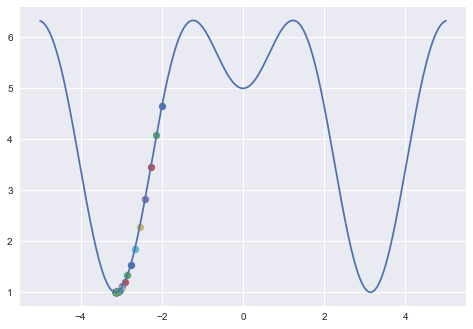

minimum of above function is at x = -3.1415926535897927


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# f = lambda x : x**4 + x**3 - 2*x**2 - 2*x
# d_f = lambda x : 4*x**3 + 3*x**2 -4*x - 2
f2 =  lambda x : 3*np.sin(x)**2  + 2*np.cos(x) + 3
d_f2 = lambda x : 2*np.sin(2*x) -2*np.sin(x)

def gradient_descent(f, d_f, lr, init, N):
    x = np.linspace(-5,5,1000)
    y = f(x)
    plt.plot(x,y)
    #plt.text(x=-1,y=2,s = r'$lr=0.03, x_{0}=-1.3$')
    #plt.title(r'$3sin^{2}(x) + 2cos(x) + 3$')
    for i in range(N):
        plt.scatter(init, [f(init)])
        init = init - lr * d_f(init)
        
    plt.show()
    return init


minimum_at = gradient_descent(f2,d_f2, init=-2,lr=0.04, N=200)
print(f"minimum of above function is at x = {minimum_at}")